# **Step 1: Import Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# **Step 2: Load Dataset**

In [5]:
df = pd.read_csv("/content/loan_approval_dataset.csv")

print(df.head())


   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             9270               5585         138               180   
1             2860               4699         378               240   
2             7390               4777         629               240   
3             7191               3900         406               180   
4            13964               6677         659               240   

   Credit_History  Gender Married     Education Self_Employed Property_Area  \
0               1    Male      No      Graduate           Yes     Semiurban   
1               1    Male     Yes  Not Graduate           Yes         Rural   
2               1  Female      No      Graduate           Yes         Urban   
3               1    Male      No      Graduate            No     Semiurban   
4               1  Female      No      Graduate            No         Rural   

  Loan_Status  
0    Approved  
1    Rejected  
2    Approved  
3    Approved  
4    Approved  


# **Step 3: Data Analysis**

In [6]:

print(df.info())

print(df.describe())

print("Rows and Columns:", df.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ApplicantIncome    1000 non-null   int64 
 1   CoapplicantIncome  1000 non-null   int64 
 2   LoanAmount         1000 non-null   int64 
 3   Loan_Amount_Term   1000 non-null   int64 
 4   Credit_History     1000 non-null   int64 
 5   Gender             1000 non-null   object
 6   Married            1000 non-null   object
 7   Education          1000 non-null   object
 8   Self_Employed      1000 non-null   object
 9   Property_Area      1000 non-null   object
 10  Loan_Status        1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB
None
       ApplicantIncome  CoapplicantIncome   LoanAmount  Loan_Amount_Term  \
count      1000.000000        1000.000000  1000.000000       1000.000000   
mean       8564.667000        3998.440000   376.808000        270.840000   

# **Step 4: Data Cleaning**

In [7]:

print(df.isnull().sum())

df["LoanAmount"].fillna(df["LoanAmount"].mean(), inplace=True)

df["Credit_History"].fillna(df["Credit_History"].mode()[0], inplace=True)

print("Missing values after cleaning:")
print(df.isnull().sum())


ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Gender               0
Married              0
Education            0
Self_Employed        0
Property_Area        0
Loan_Status          0
dtype: int64
Missing values after cleaning:
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Gender               0
Married              0
Education            0
Self_Employed        0
Property_Area        0
Loan_Status          0
dtype: int64


/tmp/ipython-input-3609949441.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["LoanAmount"].fillna(df["LoanAmount"].mean(), inplace=True)
/tmp/ipython-input-3609949441.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

# **DATA VISUALIZATION**
Line Plot (Applicant Income)


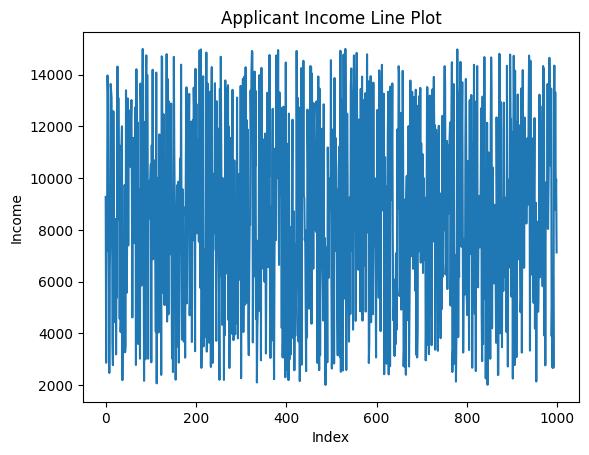

In [8]:
plt.plot(df["ApplicantIncome"])
plt.title("Applicant Income Line Plot")
plt.xlabel("Index")
plt.ylabel("Income")
plt.show()


Bar Chart (Loan Status Count)

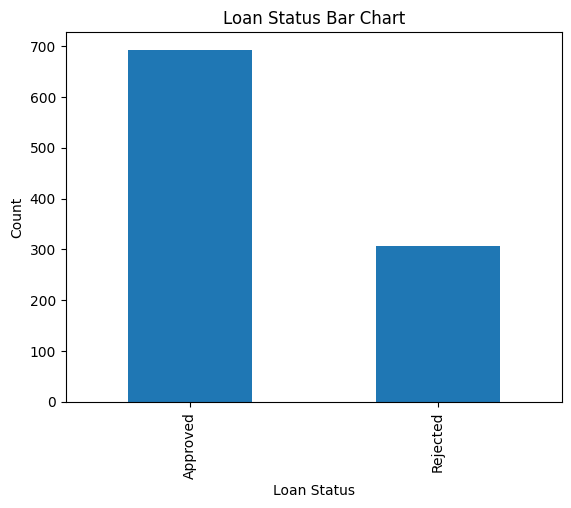

In [9]:
df["Loan_Status"].value_counts().plot(kind="bar")
plt.title("Loan Status Bar Chart")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()


Scatter Plot (Income vs Loan Amount)

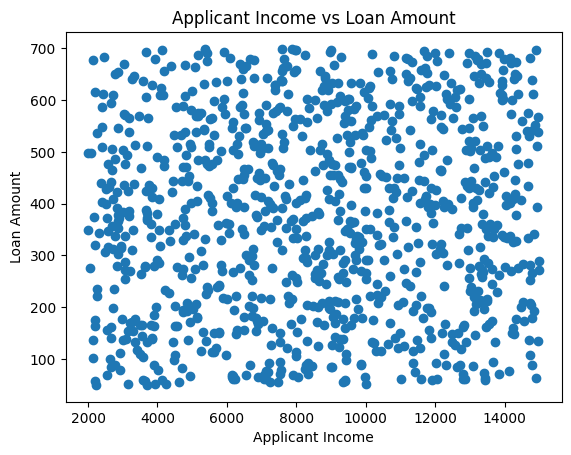

In [10]:
plt.scatter(df["ApplicantIncome"], df["LoanAmount"])
plt.title("Applicant Income vs Loan Amount")
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()


Histogram (Loan Amount Distribution)

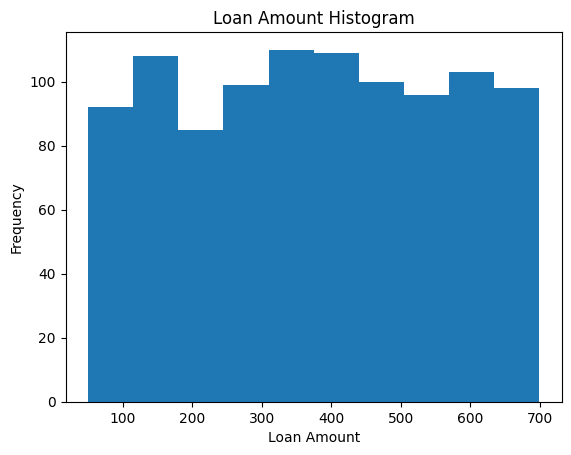

In [11]:
plt.hist(df["LoanAmount"], bins=10)
plt.title("Loan Amount Histogram")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.show()


# **Machine Learning Models Code (Python)**
**Step 1: Import Libraries**

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


**Step 2: Load Dataset**

In [13]:
df = pd.read_csv("/content/loan_approval_dataset.csv")


**Step 3: Data Preprocessing**

In [15]:

le = LabelEncoder()
for column in df.select_dtypes(include='object'):
    df[column] = le.fit_transform(df[column])

X = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]


**Step 4: Train-Test Split**

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# **MACHINE LEARNING MODELS**

**1. Logistic Regression**

In [17]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))


Logistic Regression Accuracy: 0.98


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**2. Decision Tree**

In [18]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))


Decision Tree Accuracy: 1.0


**3. Random Forest**

In [19]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))


Random Forest Accuracy: 1.0


**4. Naive Bayes**

In [20]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))


Naive Bayes Accuracy: 0.905


**Step 5: Model Comparison**

In [21]:
models = {
    "Logistic Regression": lr,
    "Decision Tree": dt,
    "Random Forest": rf,
    "Naive Bayes": nb
}

for name, model in models.items():
    pred = model.predict(X_test)
    print(name)
    print(classification_report(y_test, pred))


Logistic Regression
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       148
           1       0.94      0.98      0.96        52

    accuracy                           0.98       200
   macro avg       0.97      0.98      0.97       200
weighted avg       0.98      0.98      0.98       200

Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00        52

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00        52

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00   